In [1]:
import pandas as pd
data = pd.read_csv("adult 3.csv")

In [2]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.drop(columns=['fnlwgt','education'],inplace=True)

In [4]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [5]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']

In [6]:
data['workclass'] = data.workclass.replace({'?':'Others'})

In [7]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
Name: count, dtype: int64


In [8]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
?                    2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [9]:
data.occupation = data.occupation.replace({'?':'Unknown','Priv-house-serv':'Others','Armed-Forces':'Others'})


In [10]:
print(data['relationship'].value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [11]:
print(data['hours-per-week'].value_counts())

hours-per-week
40    22795
50     4244
45     2716
60     2176
35     1934
      ...  
79        1
94        1
87        1
69        1
82        1
Name: count, Length: 96, dtype: int64


In [12]:
print(data['native-country'].value_counts())


native-country
United-States                 43802
Mexico                          951
?                               857
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [13]:
asia = ['India', 'China', 'Japan', 'Philippines', 'Vietnam', 'Thailand', 'Taiwan', 'Cambodia', 'Laos', 'Hong', 'Iran']
europe = ['England', 'Germany', 'Italy', 'Poland', 'France', 'Portugal', 'Ireland', 'Scotland', 'Greece', 'Yugoslavia', 'Hungary', 'Holand-Netherlands']
north_america = ['United-States', 'Canada', 'Puerto-Rico']
south_america = ['Columbia', 'Ecuador', 'Peru', 'Honduras', 'El-Salvador', 'Guatemala', 'Nicaragua']
caribbean = ['Jamaica', 'Cuba', 'Haiti', 'Dominican-Republic', 'Trinadad&Tobago']
other = ['South', 'Outlying-US(Guam-USVI-etc)', 'Unknown']

def group_country(val):
    if val in asia:
        return 'Asia'
    elif val in europe:
        return 'Europe'
    elif val in north_america:
        return 'North-America'
    elif val in south_america:
        return 'South-America'
    elif val in caribbean:
        return 'Caribbean'
    elif val in other:
        return 'Other'
    else:
        return 'Other'

data['native-country'] = data['native-country'].apply(group_country)


In [14]:
print(data['income'].value_counts())

income
<=50K    37126
>50K     11685
Name: count, dtype: int64


In [15]:
data.isna().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
data = data[(data['age'] >= 17)&(data['age'] <= 75)]

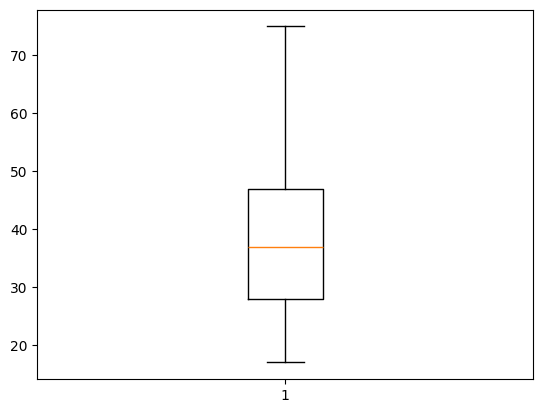

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [18]:
import joblib
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    le = LabelEncoder()
    le.fit(data[col])              # ✅ Fit on original string values
    data[col] = le.transform(data[col])  # Then transform
    encoders[col] = le             # Save encoder

joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [19]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,5,3,2,1,0,0,40,3,<=50K
1,38,3,9,2,3,0,4,1,0,0,50,3,<=50K
2,28,1,12,2,9,0,4,1,0,0,40,3,>50K
3,44,3,10,2,5,0,2,1,7688,0,40,3,>50K
4,18,2,10,4,13,3,4,0,0,0,30,3,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,11,5,4,0,0,0,38,3,<=50K
48838,40,3,9,2,5,0,4,1,0,0,40,3,>50K
48839,58,3,9,6,0,4,4,0,0,0,40,3,<=50K
48840,22,3,9,4,0,3,4,1,0,0,20,3,<=50K


In [20]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [22]:
from xgboost import XGBClassifier

# Handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model1 = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model1.fit(X_train, y_train)


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:22:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model1.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


[[6134 1229]
 [ 345 1980]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7363
           1       0.62      0.85      0.72      2325

    accuracy                           0.84      9688
   macro avg       0.78      0.84      0.80      9688
weighted avg       0.87      0.84      0.85      9688

ROC AUC Score: 0.8423486219239177


In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.8375309661436829


In [25]:
import joblib
joblib.dump(model1,"XGBoost_Algorithm.pkl")

['XGBoost_Algorithm.pkl']